## Final Project Submission

Please fill out:
* Student name: **Pride Amos**
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: William Okomba
* Blog post URL:


# Business Understanding

## *Business Understanding Overview*

This is a project for a real estate agency:Alliance Realtors that helps homeowners buy and/or sell homes.We saw the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

**Stakeholder:**  Alliance Realtors

**Business Problem:** 

**Business Question:** What features should you consider when renovating a home that would ultimately lead to a higher sale price?

## *Business Objectives*

This study is commisioned with the following objectives:
 * Improve buying and selling of renovated houses by making better recommendations
 * Increase value of renovated homes and provide recommendations and by what amount
 
The study will be judged a success if:
 * Home-sales increase by 10%.
 * Renovated homes increase in value.
 * The study finishes on time and under budget.

## Data Understanding

#### Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.stats.api as stat_api
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
house_df = pd.read_csv('data/kc_house_data.csv')
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


   * Finding the shape of the data
   * The columns names
   * The data types
   * The unique values
   * Description of the data
   * The null values

In [3]:
#names of columns


house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# checking for the data types


house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# checking for rows and columns

house_df.shape

(21597, 21)

In [6]:
# Description of the data

house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Checking for null values

house_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Year renovated and waterfront columns had many null values

In [8]:
# checking for duplicates
house_df.duplicated().sum()

0

In [9]:
# checking for correlation

house_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


In [10]:
house_df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

### *Data description report*

There are many records and attributes to process in a real estate agency.

Data Quantity:

   * The loaded data was in csv format
   * The data set has 21597 rows and 21 columns

Data Quality:
   * There were columns with notable characterisics for the study
   * The data types were:float64(6), int64(9), object(6)
   * There were null values in the yr_renovated and waterfront columns
   * There were no duplicated values

## Data Cleaning

In [11]:
def missing_values(data):
    miss_val = house_df.isna().sum().sort_values(ascending = False)
    
    # percentages of missing values
    percentage = (house_df.isna().sum() / len(data)).sort_values(ascending = False)
    
    #creating a dataframe for the missing
    missing_df = pd.DataFrame({"Total Missing Values": miss_val,"percentages(%)": percentage})
    
    # if percentage == 0 implies no missing values
    missing_df.drop(missing_df[missing_df["percentages(%)"] ==0].index, inplace=True)
    
    return missing_df

In [12]:
missing_values(house_df)

,Total Missing Values,percentages(%)
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917


Having a close look at the columns with missing values

The view column has few null values dropping the null values would  not be appropriate.Hence i replaced with missing because it is a categorical data

After trying,i decided to transform `view`,`grade` and `condition` to numbers for model making.

In [13]:
house_df['view'].fillna('Missing', inplace=True)

In [14]:
house_df['view'].replace(to_replace=['Missing', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'], value=[1, 2, 3, 4, 5], inplace=True)

In [15]:
house_df['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True)

In [16]:
house_df['grade'].replace(to_replace=['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], value=[7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13], inplace=True)

The other null values from yr_renovated and waterfront are many so i decided to drop the null values

In [17]:
house_df.dropna(inplace=True)

In [18]:
house_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

i also decided to change the `sqft_basement` into integer so that i can understand the data better

In [19]:
house_df['sqft_basement'] = house_df['sqft_basement'].str.replace('?', '0', regex=False).astype(np.float64)

In [20]:
house_df['sqft_basement'].unique

<bound method Series.unique of 1         400.0
3         910.0
4           0.0
5        1530.0
6           0.0
          ...  
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21596       0.0
Name: sqft_basement, Length: 15809, dtype: float64>

I decided to drop longitudes and latitudes as this is well given by the zipcode

In [21]:
house_df.drop(columns=['id', 'lat', 'long'], inplace=True)

While going through the columns i noticed that the `date` represented the date the house was sold and thought it better to just have the year the house was sold

In [22]:
# convert the sell date object to a datetime object
house_df['date'] = pd.to_datetime(house_df['date'])
# make a new column of just the years the house was sold, as an integer 
house_df['sell_yr'] = house_df['date'].dt.year.astype(int)

# i'm only making a column that represents the difference in years, as the data set
# only has the years of when the house was built or renovated, and not the exact date

In [23]:
house_df.drop(columns='date', inplace=True)

## Exploratory Data Analysis

### Univariate

#### (a).Numerical

In [24]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15809 entries, 1 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15809 non-null  float64
 1   bedrooms       15809 non-null  int64  
 2   bathrooms      15809 non-null  float64
 3   sqft_living    15809 non-null  int64  
 4   sqft_lot       15809 non-null  int64  
 5   floors         15809 non-null  float64
 6   waterfront     15809 non-null  object 
 7   view           15809 non-null  object 
 8   condition      15809 non-null  int64  
 9   grade          15809 non-null  int64  
 10  sqft_above     15809 non-null  int64  
 11  sqft_basement  15809 non-null  float64
 12  yr_built       15809 non-null  int64  
 13  yr_renovated   15809 non-null  float64
 14  zipcode        15809 non-null  int64  
 15  sqft_living15  15809 non-null  int64  
 16  sqft_lot15     15809 non-null  int64  
 17  sell_yr        15809 non-null  int32  
dtypes: flo

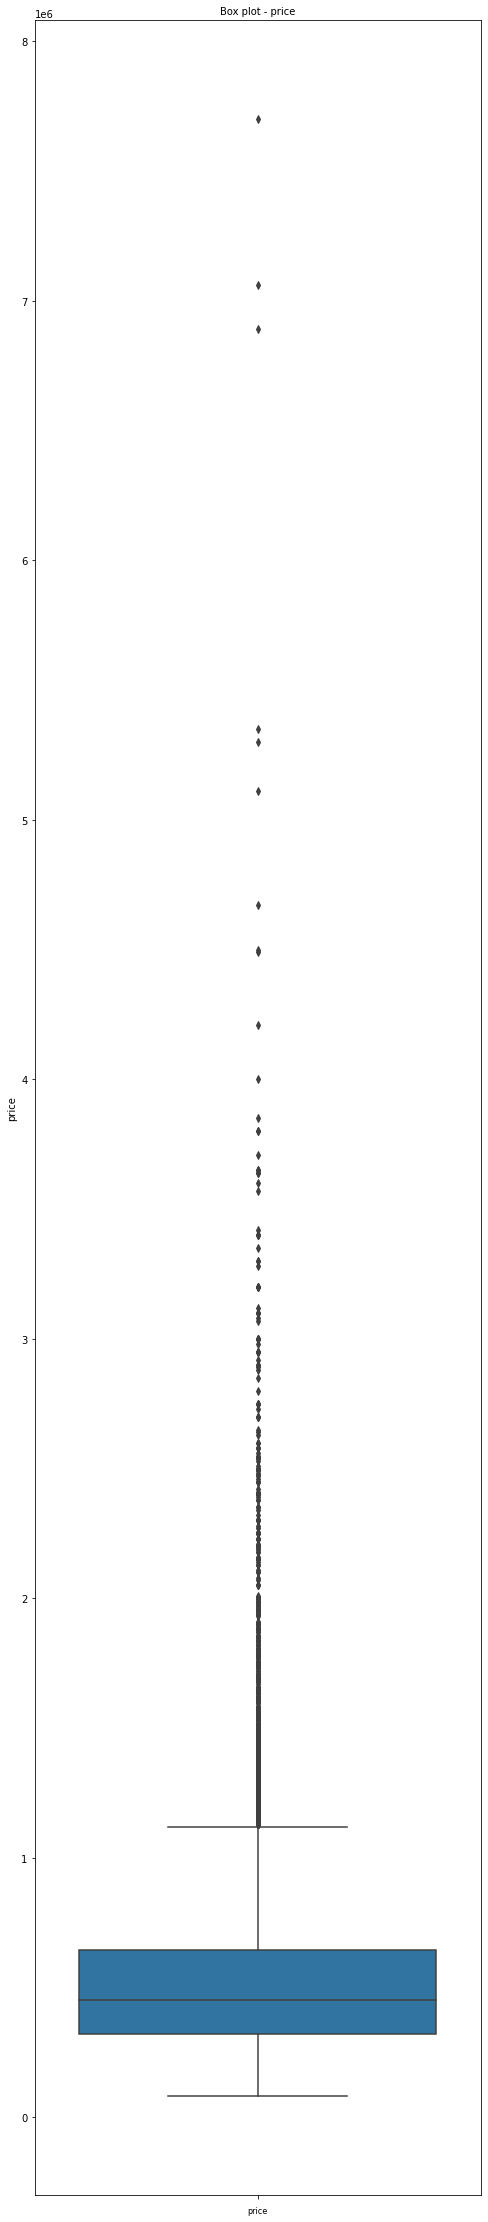

In [25]:
col_names = ['price']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = house_df[col_val], ax= ax)
  ax.set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax.set_xlabel(col_val, fontsize= 8)
plt.show()

# From the boxplots below it can be seen that there are a lot of outliers.

In [26]:
# Checking for Outliers

Q1_prices = house_df['price'].quantile(.25)
Q3_prices = house_df['price'].quantile(.75)

IQR_prices = Q3_prices - Q1_prices


anomalies = house_df[(house_df.price < Q1_prices - 1.5* IQR_prices)  |
                    (house_df.price > Q3_prices + 1.5 * IQR_prices) ]
print('Price outliers are: ' + str(anomalies.price.count()))

Price outliers are: 850


From the above, the outliers are too many to remove as this will affect the accuracy of the data analysis, and the result could be inconclusive and/or incorrect.

#### (b).Categorical

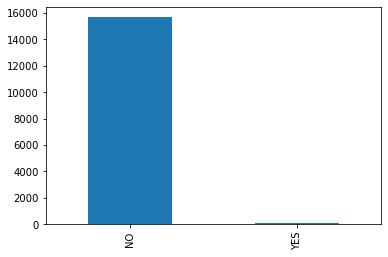

In [27]:
# Records of the waterfront (yes or no)

house_df.waterfront.value_counts().plot.bar();

The NO contains the majority of the data, suggesting most of the houses lack waterfronts. Due to this, we'll be using the NO for our analysis. during the hypothesis testing. Furthermore, since we'll be using the z-score, the larger the data, the more accurate the results will be.

### (c).Summary Statistics

In [28]:
# central tendencies

# mean
print('The mean of price: ' +str(house_df.price.mean()))
# median
print('The median of price: ' +str(house_df.price.median()))
# mode
print('The mode of price: ' +str(house_df.price.mode()))
# range
print('The range of price: ' +str(house_df.price.max() - house_df.price.min()))
# standard deviation
print('The standard deviation of price: ' +str(house_df.price.std()))
# Variance
print('The variance of price: ' +str(house_df.price.var()))
# quantiles
print('The quantiles of price: \n' +str(house_df.price.quantile([0.25,0.5,0.75])))
# Skewness
print('The skewness of price: ' +str(house_df.price.skew()))
# kurtosis
print('The kurtosis of price: ' +str(house_df.price.kurt()))

The mean of price: 541547.3457524196
The median of price: 450000.0
The mode of price: 0    350000.0
Name: price, dtype: float64
The range of price: 7618000.0
The standard deviation of price: 373927.3481173435
The variance of price: 139821661670.06897
The quantiles of price: 
0.25    321000.0
0.50    450000.0
0.75    644500.0
Name: price, dtype: float64
The skewness of price: 4.287340185579478
The kurtosis of price: 38.87555349159941


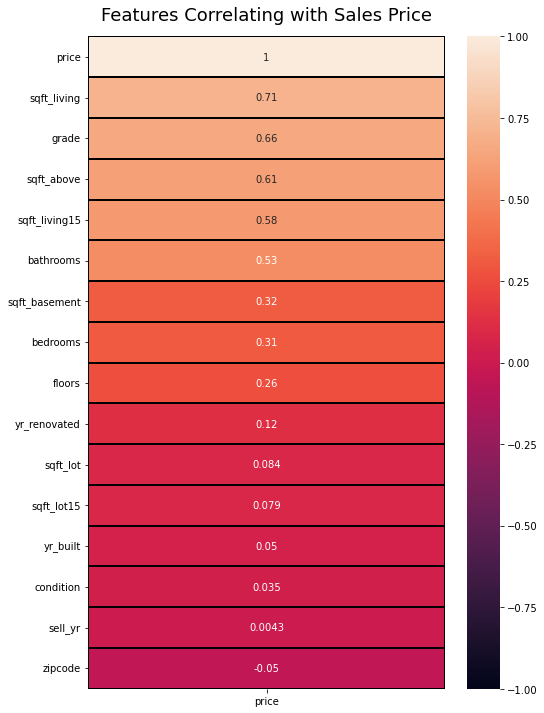

In [29]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(
    house_df.corr()[['price']].sort_values(by='price',ascending=False),
    vmin=-1, vmax=1, annot=True,linewidths=2, linecolor='black')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

C:\Users\hp\AppData\Local\Temp\ipykernel_14936\1527124013.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df["price"]);


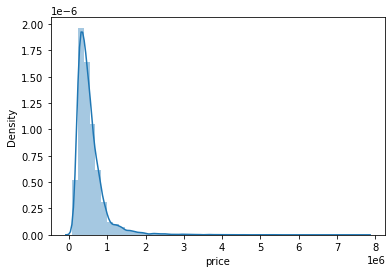

In [30]:
# Plotting Histogram to show the above

sns.distplot(house_df["price"]);

# The data is right-skewed with a heavy tail as was discovered by the skewness and kurtosis.

### Universal Analysis Recommendation

The data is heavily skewed to the left i.e. leptokurtic, as was suspected due to the large number of outliers. This suggests that my initial decision to keep them is justified as this is not a normally distributed dataset.I have decided to use the price column as our target variable.

### BIVARIATE

#### (a).Numeric

In [31]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15809 entries, 1 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15809 non-null  float64
 1   bedrooms       15809 non-null  int64  
 2   bathrooms      15809 non-null  float64
 3   sqft_living    15809 non-null  int64  
 4   sqft_lot       15809 non-null  int64  
 5   floors         15809 non-null  float64
 6   waterfront     15809 non-null  object 
 7   view           15809 non-null  object 
 8   condition      15809 non-null  int64  
 9   grade          15809 non-null  int64  
 10  sqft_above     15809 non-null  int64  
 11  sqft_basement  15809 non-null  float64
 12  yr_built       15809 non-null  int64  
 13  yr_renovated   15809 non-null  float64
 14  zipcode        15809 non-null  int64  
 15  sqft_living15  15809 non-null  int64  
 16  sqft_lot15     15809 non-null  int64  
 17  sell_yr        15809 non-null  int32  
dtypes: flo

In [32]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=house_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [33]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876023
"(grade, sqft_living)",0.764699
"(sqft_above, grade)",0.758407
"(sqft_living15, sqft_living)",0.756818
"(bathrooms, sqft_living)",0.754361


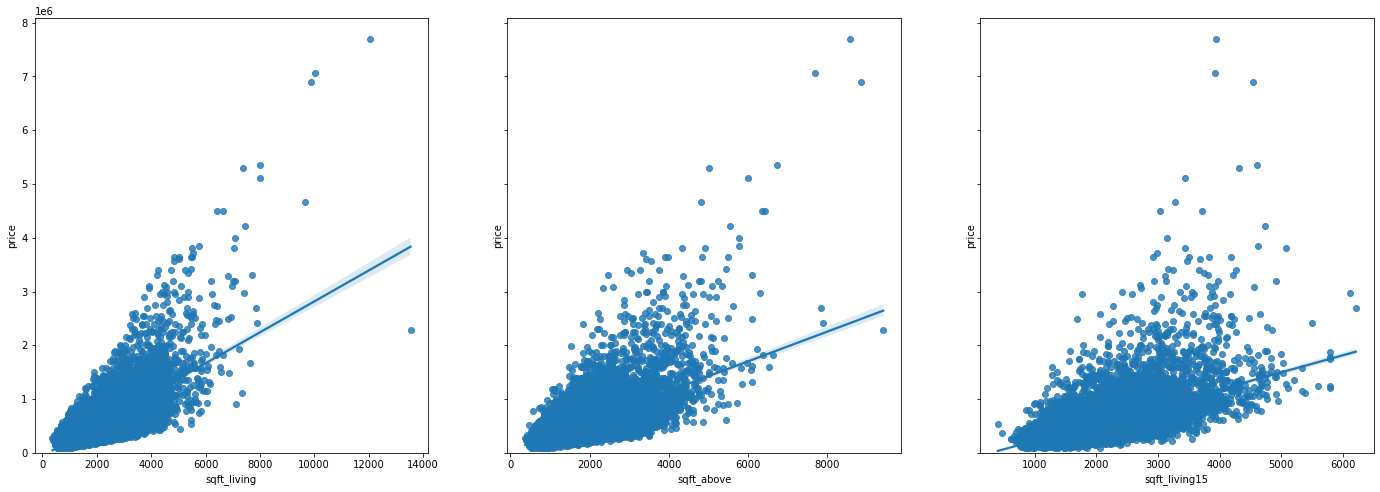

In [34]:
# Visualization with regplot
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(24, 8))
sns.regplot(x=house_df["sqft_living"],y=house_df["price"],data=house_df,ax=axs[0])
sns.regplot(x=house_df["sqft_above"],y=house_df["price"],data=house_df,ax=axs[1])
sns.regplot(x=house_df["sqft_living15"],y=house_df["price"],data=house_df,ax=axs[2])
plt.ylim(0,);

This shows their is linearity between sqft_living,sqft_above,sqft_living15 and price

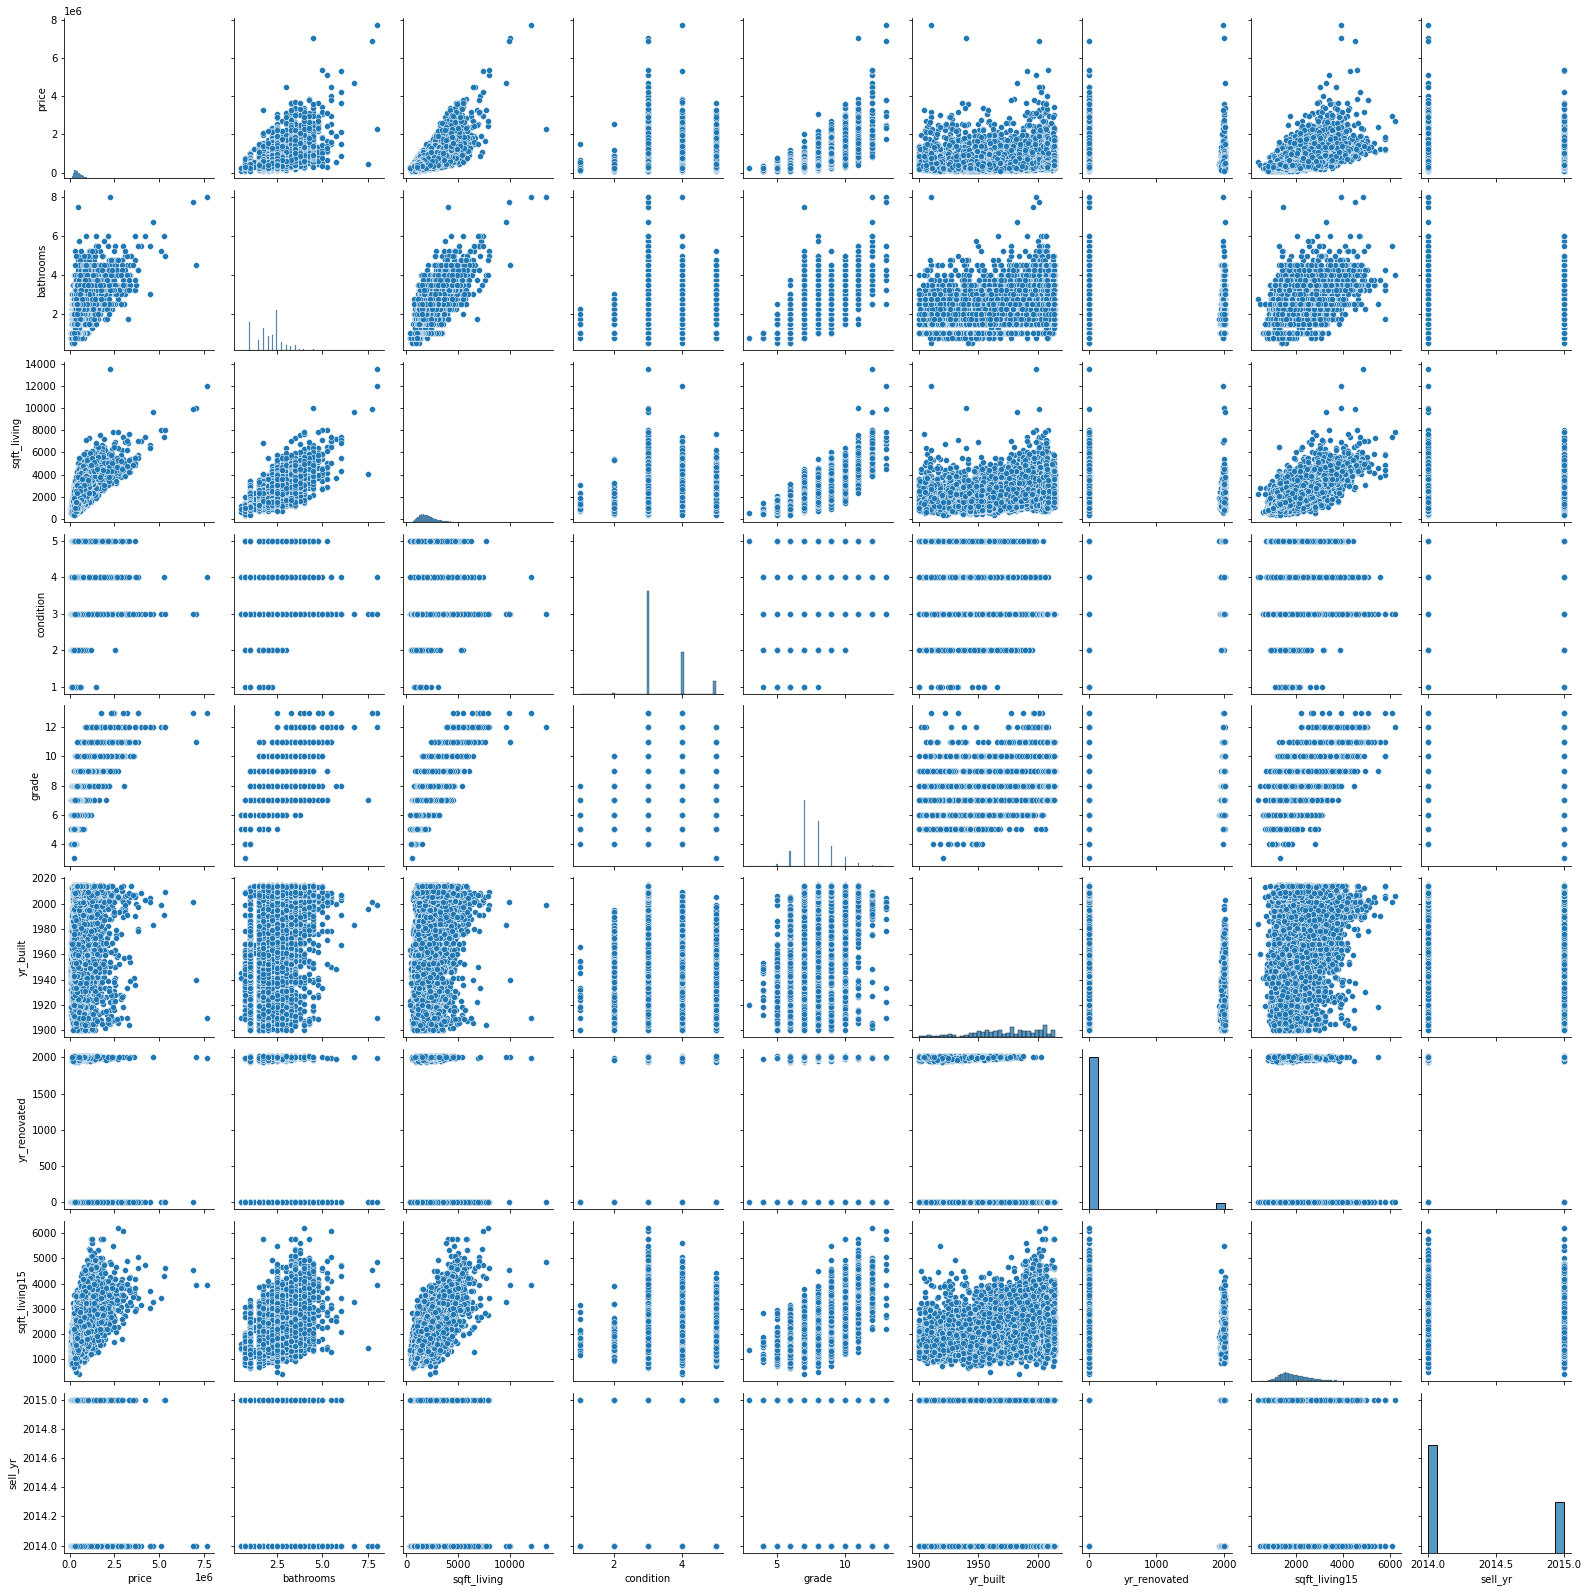

In [35]:
Numerical_data = house_df.drop(['zipcode','sqft_lot','bedrooms',
                               'floors','sqft_above','sqft_basement','sqft_lot15'], axis=1)
sns.pairplot(Numerical_data);

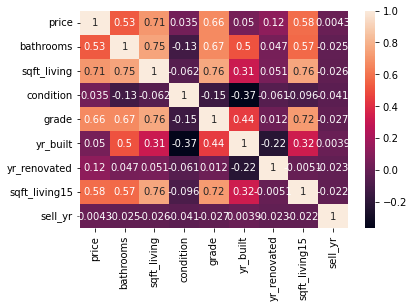

In [36]:
sns.heatmap(Numerical_data.corr(), annot=True)
plt.show()

#### (b).Categorical

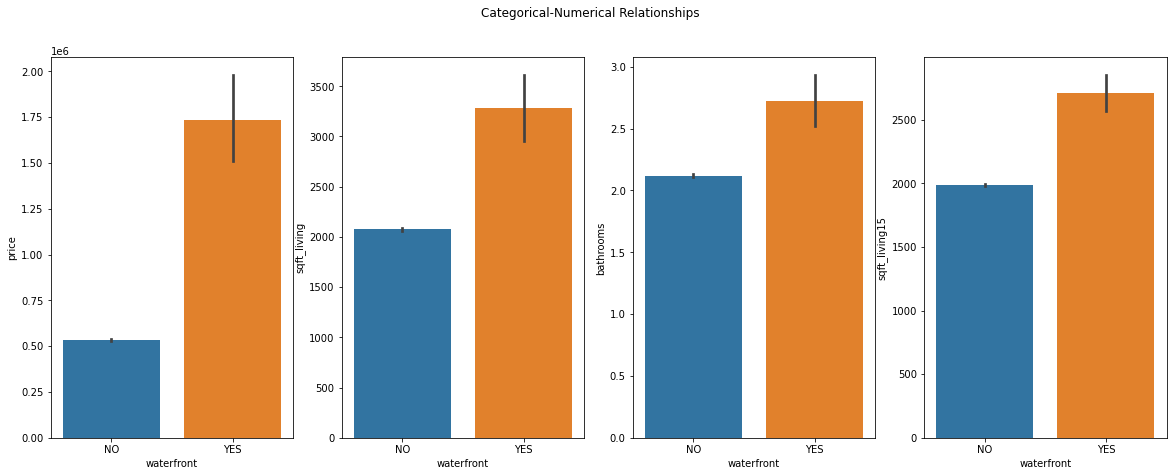

In [37]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20, 7))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= house_df.waterfront, y= house_df.price, ax=ax1)
sns.barplot(x= house_df.waterfront, y= house_df.sqft_living, ax=ax2)
sns.barplot(x= house_df.waterfront, y= house_df.bathrooms, ax=ax3)
sns.barplot(x= house_df.waterfront, y= house_df.sqft_living15, ax=ax4)
plt.show()


# Contrary to what i believed in the univariate analysis, the YES meaning house with waterfront seems to have more advantage.
# This could be due to the house with waterfront having more features than the other houses without the features.

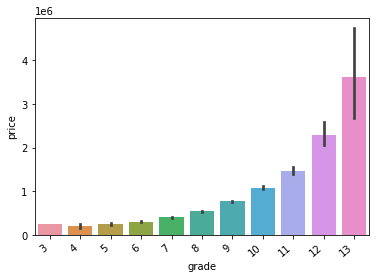

In [38]:
fig,ax = plt.subplots()
grade = house_df.grade
prices = house_df.price
sns.barplot(data = house_df,x=grade,y = prices)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

From the above the better the grade,the higher the price.This means that the house with a good grade will definitely have a high price

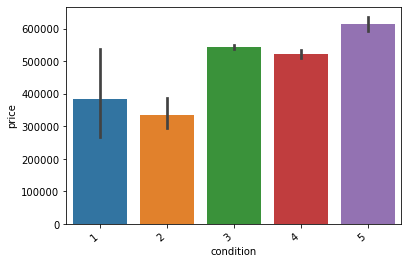

In [39]:
fig,ax = plt.subplots()
condition = house_df.condition
prices = house_df.price
sns.barplot(data = house_df,x=condition,y = prices)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

The better the condition the higher the price.With houses in a very good condition having the highest price


#### c) Bivariate Analysis Recommendation

From the above, we can see that the houses with waterfront have more activity, and this could be due to the features that people want to have. Even though this contradicts the univariate analysis, i will still use the house with waterfront(YES) to conduct my  hypothesis testing, since the house with waterfront has more activity, hence more rows of data to work with. The more the data, the better my model will be.

## HYPOTHESIS TESTING

Determine if the mean of the number prices of houses from zipcodes starting with ‘98’ is at least similar to that of all the United States zipcodes. To investigate this, our hypothesis will be:
  * The Null Hypothesis is that mean of the number prices of houses from zipcodes starting with ‘98’ is greater or equal to that of all the United    States zipcodes at the waterfronts
  
  
  $   Ho: \mu_{zipcode'98'} >= \mu_{US zipcodes}    $
  
  * The Alternate Hypothesis is that mean of the number prices of houses from zipcodes starting with ‘98’ is less than that of all the United    States zipcodes at the waterfronts
  
  $  HA: \mu_{zipcode'98} = \mu_{USzipcodes}     $

In [40]:
house_df.zipcode.unique()

array([98125, 98136, 98074, 98053, 98003, 98198, 98146, 98038, 98115,
       98107, 98126, 98019, 98103, 98002, 98133, 98040, 98092, 98030,
       98112, 98052, 98027, 98117, 98058, 98001, 98056, 98166, 98119,
       98023, 98007, 98070, 98148, 98105, 98042, 98059, 98122, 98144,
       98004, 98005, 98034, 98075, 98010, 98118, 98199, 98032, 98045,
       98102, 98077, 98108, 98178, 98177, 98065, 98029, 98006, 98109,
       98022, 98033, 98155, 98024, 98168, 98011, 98031, 98106, 98028,
       98072, 98188, 98008, 98055, 98116, 98014, 98039], dtype=int64)

In [41]:
# Target Population

Target = house_df.copy(deep = True)
Target.zipcode = Target.zipcode.astype(str)
Target.zipcode.dtype

dtype('O')

In [42]:
Target = Target.loc[Target.zipcode.str.startswith('98')]
Target.zipcode = Target.zipcode.astype(int)
Target.zipcode.dtype

dtype('int32')

In [43]:
Target.zipcode.unique()

array([98125, 98136, 98074, 98053, 98003, 98198, 98146, 98038, 98115,
       98107, 98126, 98019, 98103, 98002, 98133, 98040, 98092, 98030,
       98112, 98052, 98027, 98117, 98058, 98001, 98056, 98166, 98119,
       98023, 98007, 98070, 98148, 98105, 98042, 98059, 98122, 98144,
       98004, 98005, 98034, 98075, 98010, 98118, 98199, 98032, 98045,
       98102, 98077, 98108, 98178, 98177, 98065, 98029, 98006, 98109,
       98022, 98033, 98155, 98024, 98168, 98011, 98031, 98106, 98028,
       98072, 98188, 98008, 98055, 98116, 98014, 98039])

In [44]:
print('The United States data has: ' + str(Target.shape[0]) + ' rows')

The United States data has: 15809 rows


In [45]:
# Selecting weekdays only

Target = Target[Target.waterfront == 'NO']

print('The United States data for the house with NO waterfront has: ' + str(Target.shape[0]) + ' rows')

# As was expected, the NO data contains more data then the YES.

The United States data for the house with NO waterfront has: 15688 rows


In [46]:
Target.zipcode.value_counts()

98038    439
98103    426
98052    413
98042    409
98115    409
        ... 
98010     70
98102     65
98024     59
98148     42
98039     35
Name: zipcode, Length: 70, dtype: int64

In [47]:
Sample = Target.copy(deep= True)
Sample = Sample.groupby('zipcode', group_keys=False).apply(lambda x: x.sample(30, random_state=10))
Sample

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sell_yr
18920,460000.0,3,2.50,2720,40813,2.0,NO,NONE,3,8,2720,0.0,2001,0.0,98001,2250,40511,2014
3183,515000.0,3,2.50,3430,48993,2.0,NO,NONE,3,9,3430,0.0,2001,0.0,98001,2460,36256,2014
5525,260000.0,3,1.75,2170,10018,1.0,NO,NONE,4,7,1630,540.0,1978,0.0,98001,2049,15263,2014
14487,171500.0,3,1.00,1150,6480,1.5,NO,NONE,4,5,1150,0.0,1946,0.0,98001,1100,7300,2015
6485,280000.0,2,1.75,1894,52769,1.5,NO,NONE,4,6,1520,374.0,1936,0.0,98001,1820,50529,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15024,1300000.0,3,2.75,3450,5350,1.5,NO,4,4,9,2590,860.0,1925,0.0,98199,2910,5350,2015
19906,455000.0,2,2.00,1350,1209,3.0,NO,NONE,3,8,1350,0.0,2013,0.0,98199,1310,982,2014
10089,550000.0,2,1.75,1740,7290,1.0,NO,NONE,3,8,1280,0.0,1950,0.0,98199,1820,6174,2014
8419,640000.0,3,2.00,1380,4800,1.0,NO,NONE,3,7,1380,0.0,1948,0.0,98199,1740,5640,2014


In [48]:
population_mean = house_df.price.mean()
population_deviation = house_df.price.std()
sample_mean = Sample.price.mean()
sample_deviation = Sample.price.std()

population_mean, population_deviation, sample_mean, sample_deviation

(541547.3457524196, 373927.3481173435, 547822.3871428572, 410275.4396593625)

In [49]:
z = (sample_mean - population_mean) / population_deviation
print('The Z-score is: ', z)

# The z-score tells us that the sample mean is 0.17 standard deviations away from the population mean
# this is within the 1.645 critical value (since it is a one-tailed test), which is the area where 95% confidence level lies. We can therefore 
# not reject the null hypothesis.

The Z-score is:  0.016781445438616163


In [50]:
p_value = 1 - stats.norm.cdf(z)
p_value

# The p value is greater than the alpha therefore, it is not statistically significant. 
# This indicates strong evidence for the null hypothesis.

0.49330548610448155

# MODELLING

### Simple Linear Regression

**Splitting Data**

**First Baseline Model**

In [51]:
y = house_df["price"]
X_baseline = house_df[["sqft_above"]]

In [52]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     9445.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:25:55   Log-Likelihood:            -2.2159e+05
No. Observations:               15809   AIC:                         4.432e+05
Df Residuals:                   15807   BIC:                         4.432e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.669e+04   5609.215      8.323      0.0

In [53]:
baseline_results.params

const         46686.684561
sqft_above      276.034178
dtype: float64

The R_squared is weak and hence a need to improve this model.There is a low P value, so there is some significance, but the R squared value tells me that the model isn't good enough to account for more than 37% of the data

Our model is statistically significant overall, and explains about 37% of the variance
in SalePrice.

Both our intercept and our coefficient for sqft_above are statistically significant.

Our intercept is about 46686, meaning that a house with 0 square feet of above-ground area would cost about 46686 USD.

Our coefficient for sqft_above is about 276, which means that for each additional square
foot of above ground living area, we expect the price to increase about 276 USD.

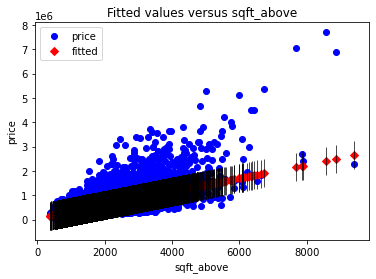

In [54]:
sm.graphics.plot_fit(baseline_results, "sqft_above")
plt.show()

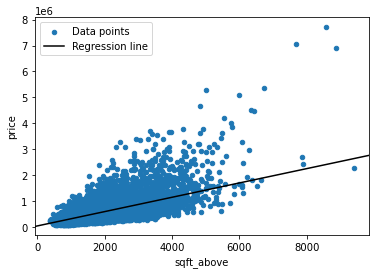

In [55]:
fig, ax = plt.subplots()
house_df.plot.scatter(x="sqft_above", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

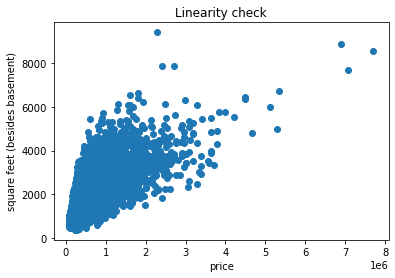

In [56]:
# scatter plot to check for linearity
plt.scatter(house_df['price'], house_df['sqft_above'])
plt.title("Linearity check")
plt.xlabel('price')
plt.ylabel('square feet (besides basement)')
plt.show();

**check for homoscedacity and linearity**

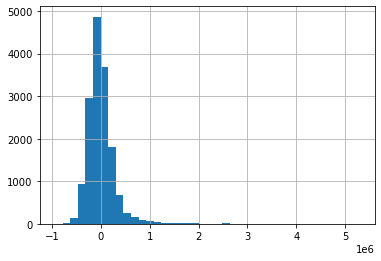

In [57]:
baseline_results.resid.hist(bins=40);

This seems to be slightly normal but maybe the outliers are making it difficult to get a proper visual.

i therefore decided to try removing the outliers and see if some change will be noted.

In [58]:
no_outliers = house_df.loc[house_df['price'] < 1500000]

print(len(house_df) - len(no_outliers))

390


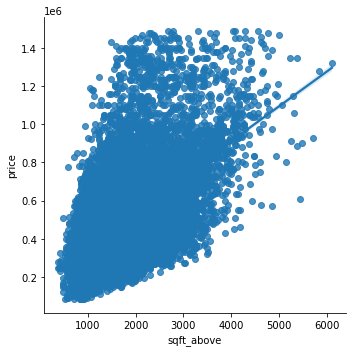

In [59]:
# let's re run the scatter plot without the outliers
sns.lmplot(x='sqft_above', y='price', data=no_outliers);

The relationship is linear now more clearer.

In [60]:
form = 'price~sqft_above'

price_sqft_model = ols(formula=form, data=no_outliers).fit()

print(price_sqft_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     7008.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:26:01   Log-Likelihood:            -2.1044e+05
No. Observations:               15419   AIC:                         4.209e+05
Df Residuals:                   15417   BIC:                         4.209e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.832e+05   4139.594     44.250      0.0

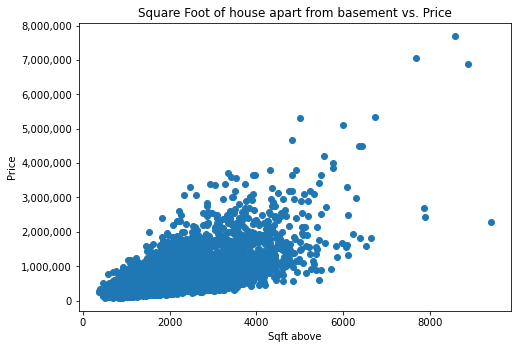

In [111]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.scatter(x=house_df['sqft_above'], y=house_df['price'])
plt.title('Square Foot of house apart from basement vs. Price')
plt.xlabel('Sqft above')
plt.ylabel('Price')
plt.ticklabel_format(style='plain')
ax.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.savefig('sqftliving.png', bbox_inches='tight', dpi=300);

### Multiple Regression

### One hot encoding before multiple regression

In [61]:
# import label encoder from sklearn
from sklearn.preprocessing import LabelEncoder
laibel = LabelEncoder()

# make some labels for waterfront, view and zipcode
lbl_wtrfrnt = pd.get_dummies(no_outliers['waterfront'], prefix='wtrfrnt', drop_first=True)
lbl_view = pd.get_dummies(no_outliers['view'], prefix='view', drop_first=True)
lbl_grade = pd.get_dummies(no_outliers['grade'], prefix='grade', drop_first=True)

In [62]:
# DataFrame with all non-encoded variables


houses_non_encoded = no_outliers.drop(['view','waterfront','grade'], axis=1)

In [63]:
# concatenate hot encoded variables with the rest of the variables

houses_labeled = pd.concat([houses_non_encoded, lbl_view,lbl_wtrfrnt,lbl_grade], axis=1)

### Model 1

In [64]:
y_var = 'price'
x_vars = houses_labeled[["bathrooms","sqft_living"]]
all_columns = '+'.join(x_vars.columns)
multi_formula_1 = y_var + '~' + all_columns

In [65]:
model_ver_1 = ols(formula=multi_formula_1, data=houses_labeled).fit()
print(model_ver_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     5838.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:26:01   Log-Likelihood:            -2.0898e+05
No. Observations:               15419   AIC:                         4.180e+05
Df Residuals:                   15416   BIC:                         4.180e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.657e+04   4632.244     20.848      

We see an improvement in our model performance based on our R-squared value which increased to 43.1 percent.
The R_squared is weak and hence a need to improve this model

Our model is statistically significant overall, and explains about 43% of the variance
in SalePrice.

Both our intercept and our coefficient for sqft_living are statistically significant but for bathrooms the p value is higher than the significance value of 0.05

Our intercept is about 96570 USD, meaning that a house with 0 square feet of living space would cost about 96570 USD.

Our coefficient for `bathrooms` is about 4944, which means that for each additional bathroom, we expect the price to increase about 4944 USD.

Our coefficient for `sqft_living` is about 194, which means that for each additional square
foot of living space, we expect the price to increase about 194 USD.

In [66]:
# get MAE to see how much error is in our model
y_predic = model_ver_1.resid
y = np.log(houses_labeled['price'])
mae_resid_1 = np.mean(np.abs(y - y_predic))
mae_resid_1

143279.24531682945

In [67]:
# and RMSE because i intend to make another model, since at least one variable has a P value that is too high
# and several coeficients are very negative 

model_ver_1.mse_resid

34684698716.69822

In [68]:
rmse_residuals_1 = np.sqrt(model_ver_1.mse_resid)
rmse_residuals_1

186238.28477705174

In [69]:
print(rmse_residuals_1 - mae_resid_1)

42959.039460222295


In [70]:
resids_1 = model_ver_1.resid

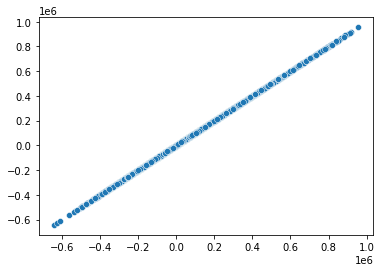

In [71]:
# check residuals for linearity

sns.scatterplot(y=y_predic,x=resids_1);

In [72]:
type(resids_1)

pandas.core.series.Series

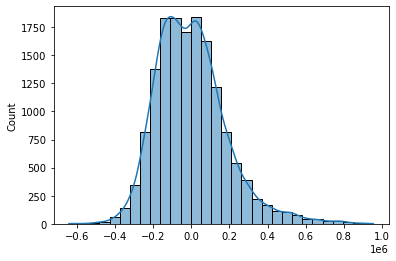

In [73]:
# and normality of residuals

sns.histplot(data=resids_1,bins=30, kde=True);

C:\Users\hp\AppData\Local\Temp\ipykernel_14936\2855247223.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


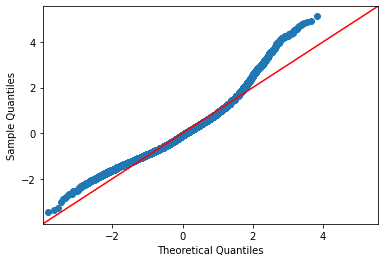

In [74]:
# a QQ plot to see if an S curve, therefore forms normal distribution

from scipy import stats

fig = sm.graphics.qqplot(resids_1, dist=stats.norm, line='45', fit=True)
fig.show()

## Model 2

In [75]:
y_var = 'price'
x_vars = houses_labeled[["bathrooms","sqft_living","sqft_above","condition"]]
all_columns = '+'.join(x_vars.columns)
multi_formula_2 = y_var + '~' + all_columns

In [76]:
model_ver_2 = ols(formula=multi_formula_2, data=houses_labeled).fit()
print(model_ver_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     3002.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:26:03   Log-Likelihood:            -2.0889e+05
No. Observations:               15419   AIC:                         4.178e+05
Df Residuals:                   15414   BIC:                         4.178e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -2.25e+04   9903.428     -2.271      

We see an improvement in our model performance based on our R-squared value which increased to 44 percent.

**checking for errors**

In [77]:
# get MAE to see how much error is in our model
y_predic = model_ver_2.resid
y = np.log(houses_labeled['price'])
mae_resid_2 = np.mean(np.abs(y - y_predic))
mae_resid_2

142532.6100013028

In [78]:
# and RMSE because i intend to make another model, since at least one variable has a P value that is too high
# and several coeficients are very negative 

model_ver_2.mse_resid

34268919099.39663

In [79]:
rmse_residuals_2 = np.sqrt(model_ver_2.mse_resid)
rmse_residuals_2

185118.66221263763

In [80]:
print(rmse_residuals_2 - mae_resid_2)

42586.05221133484


In [81]:
resids_2 = model_ver_2.resid

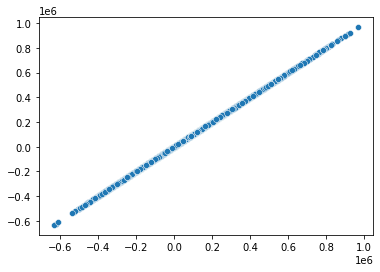

In [82]:
# check residuals for linearity

sns.scatterplot(y=y_predic,x=resids_2);

In [83]:
type(resids_2)

pandas.core.series.Series

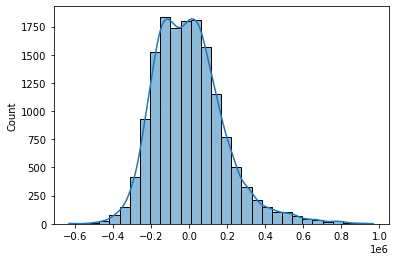

In [84]:
# and normality of residuals

sns.histplot(data=resids_2,bins=30, kde=True);

C:\Users\hp\AppData\Local\Temp\ipykernel_14936\432007506.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


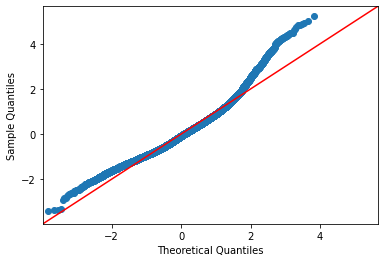

In [85]:
# a QQ plot to see if an S curve, therefore forms normal distribution

from scipy import stats

fig = sm.graphics.qqplot(resids_2, dist=stats.norm, line='45', fit=True)
fig.show()

## Model 3

In [86]:
houses_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 1 to 21596
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15419 non-null  float64
 1   bedrooms       15419 non-null  int64  
 2   bathrooms      15419 non-null  float64
 3   sqft_living    15419 non-null  int64  
 4   sqft_lot       15419 non-null  int64  
 5   floors         15419 non-null  float64
 6   condition      15419 non-null  int64  
 7   sqft_above     15419 non-null  int64  
 8   sqft_basement  15419 non-null  float64
 9   yr_built       15419 non-null  int64  
 10  yr_renovated   15419 non-null  float64
 11  zipcode        15419 non-null  int64  
 12  sqft_living15  15419 non-null  int64  
 13  sqft_lot15     15419 non-null  int64  
 14  sell_yr        15419 non-null  int32  
 15  view_2         15419 non-null  uint8  
 16  view_3         15419 non-null  uint8  
 17  view_4         15419 non-null  uint8  
 18  view_5

In [87]:

y_var = 'price'
x_vars = houses_labeled.drop('price', axis=1)
all_columns = '+'.join(x_vars.columns)
multi_formula_3 = y_var + '~' + all_columns

In [88]:
model_ver_3 = ols(formula=multi_formula_3, data=houses_labeled).fit()
print(model_ver_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     900.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:26:05   Log-Likelihood:            -2.0568e+05
No. Observations:               15419   AIC:                         4.114e+05
Df Residuals:                   15389   BIC:                         4.117e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.764e+07   5.85e+06     -8.146

Our new model is statistically significant overall, and explains about 63% of the
variance in Price. This is about 20% more variance explained than the simple
model.

Using an alpha of 0.05, our intercept and coefficients are statistically significant,
except for `sqft_basement`,`sft_lot`,`sft_above`,`view_NONE` and `view_3`.

So, we have an improvement in terms of variance explained (R-Squared), but also
some values are not statistically significant.
This model would be considered "better" but not suitable as the final model.

**The Rsquared value was 0.626** meaning this translates to about 63% of the data

**Checking for errors in the model**

In [89]:
# get MAE to see how much error is in our model
y_predic = model_ver_3.resid
y = np.log(houses_labeled['price'])
mae_resid = np.mean(np.abs(y - y_predic))
mae_resid

112888.26230649702

In [90]:
#several coeficients are very negative 

model_ver_3.mse_resid

22639476778.512897

In [91]:
rmse_residuals = np.sqrt(model_ver_3.mse_resid)
rmse_residuals

150464.2043095729

In [92]:
print(rmse_residuals - mae_resid)

37575.94200307588


In [93]:
resids = model_ver_3.resid

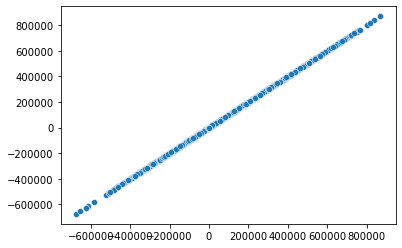

In [94]:
# check residuals for linearity

sns.scatterplot(y=y_predic,x=resids);

In [95]:
type(resids)

pandas.core.series.Series

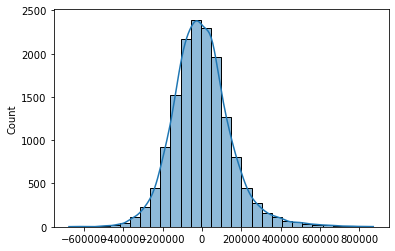

In [96]:
# and normality of residuals

sns.histplot(data=resids,bins=30, kde=True);

C:\Users\hp\AppData\Local\Temp\ipykernel_14936\3653020235.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


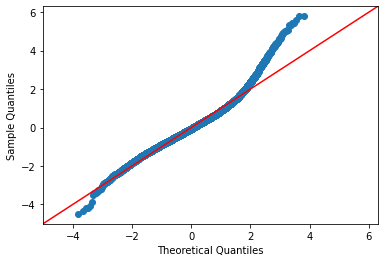

In [97]:
# a QQ plot to see if an S curve, therefore forms normal distribution

from scipy import stats

fig = sm.graphics.qqplot(resids, dist=stats.norm, line='45', fit=True)
fig.show()

### Log Transformation and scaling of model 3

### Good  R squared 

I dropped variables that have decreasing coeficients  and those with a pvalue more than 0.05, to see what our R squared value is.

In [98]:
y = houses_labeled["price"]
predictors2_5 = houses_labeled.drop(columns=['sqft_living','view_2','yr_built', 'price', 'view_3'])
predictors2_5 = sm.add_constant(predictors2_5)
model_ver_3_5 = sm.OLS(y, predictors2_5).fit()
print(model_ver_3_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     857.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:26:06   Log-Likelihood:            -2.0660e+05
No. Observations:               15419   AIC:                         4.133e+05
Df Residuals:                   15393   BIC:                         4.135e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -8.4e+07   6.14e+06    -13.672

that's pretty good, all our P values are less than 0.05.

this looks to be a relatively reliable model to use

**checking for errors in the final model**

In [99]:
# get MAE to see how much error is in our model
y_predic = model_ver_3_5.resid
y = np.log(houses_labeled['price'])
mae_resid_3_5 = np.mean(np.abs(y - y_predic))
mae_resid_3_5

121385.89519489056

In [100]:
#several coeficients are very negative 

model_ver_3_5.mse_resid

25512033314.525208

In [101]:
rmse_residuals_3_5 = np.sqrt(model_ver_3_5.mse_resid)
rmse_residuals_3_5

159724.86755206657

In [102]:
print(rmse_residuals_3_5 - mae_resid_3_5)

38338.97235717601


In [103]:
resids_3_5 = model_ver_3_5.resid

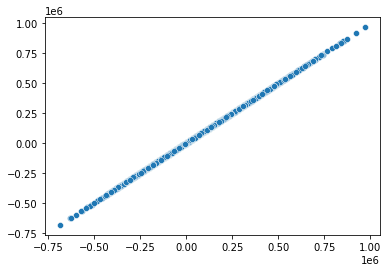

In [104]:
# check residuals for linearity

sns.scatterplot(y=y_predic,x=resids_3_5);

Final model passes linearity assumption

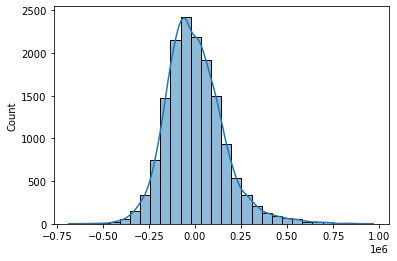

In [105]:
# and normality of residuals

sns.histplot(data=resids_3_5,bins=30, kde=True);

Final Model follows a normal distribution.

C:\Users\hp\AppData\Local\Temp\ipykernel_14936\2188975566.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


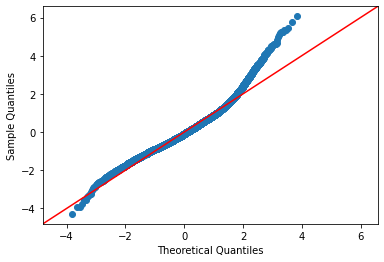

In [106]:
# a QQ plot to see if an S curve, therefore forms normal distribution

from scipy import stats

fig = sm.graphics.qqplot(resids_3_5, dist=stats.norm, line='45', fit=True)
fig.show()

## Results of the final model.

In our final regression model using all of our selected features, we saw an increase in model performance based on our R-squared value from 31 percent (baseline) to 57.5 percent (final).  Our final model also had a Root Mean Squared Error of 160949.34. On average, our model is off from the actual price by 160949.34 dollars.
All model features had a p-value < 0.05 (our alpha/significance level), which tells us that all features have a statistically significant linear relationship with price except for bathrooms and grade dummies. While we did not pass our homoscedasticity assumption in our final model we did pass our independence, linearity, and normaility assumptions, which is good. Here are some observations from our chosen model:

With each additional floor added you can increase the home sale price by 24,290 dollars.

Homes on a waterfront see an increase in property value of 13,260 dollars.

Homes that are considered to have a 'Good' view(`view_4`) sell for 32,000 dollars more than those with no view.

Homes that are considered to have an 'excellent' view(`view_5`) sell for 84,420 dollars more than those with no view.

`grade`,`sqft_above` and `sqft_living` had the strongest positive correlations with home sale price.

## Recommendations

A homeowner who is renovating a house in King County, with features in this data set, can only really control 3 things:

1) year renovated, which affects:

  2) grade,
  
  3) condition and 
  
  4) sell_year

After renovations, a homeowner can expect a $59 increase, per year after the year it was last worked on.
Find a house to renovate that has at least what is considered a 'Good' view. Homes built on these lots will see an increase in sale price of around 32,000 dollars.

Homes with grade_7(average) see a bigger increase in value than most other features. Renovating a house with grade_7(average) materials and design sees an increase in sale price of around 94,750 dollars.

Also to take into consideration is the condition of the house as houses with a good condition see an increase in sale price of around 52,000 dollars.

## Conclusion

Our model accurately fits only 57.5 percent of the data. While this is sufficient enough to make observations and insights, conclusions should be approached with caution. Additionally, a test for homoscedasticity failed in our final model, which is one of the assumptions for linear regression. Further exploration into the normalization and scaling of features might help pass that assumption. Future analysis and modeling might want to consider a couple of items:

  * Find more recent home sales data to get a more accurate picture of today's market. Finding home sale information before 2014 would also help to create a more in-depth analysis.
  * Include additional features in future models. Particularly zipcode, sqft_living, and condition.